In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree,metrics
from sklearn.preprocessing import LabelEncoder

from IPython.display import Image, display

# Data insight

In [2]:
df = pd.read_csv('./play_tennis_data.csv')
df.sort_values(by=['Outlook','Humidity','Wind'], inplace=True)
df


,Outlook,Humidity,Wind,Play
11,Overcast,High,Strong,Yes
2,Overcast,High,Weak,Yes
6,Overcast,Normal,Strong,Yes
12,Overcast,Normal,Weak,Yes
13,Rain,High,Strong,No
3,Rain,High,Weak,Yes
5,Rain,Normal,Strong,No
4,Rain,Normal,Weak,Yes
9,Rain,Normal,Weak,Yes
1,Sunny,High,Strong,No


Split the data based on Outlook:

For Overcast, all instances are "Yes", so this becomes a leaf node labeled "Yes".
For Rain and Sunny, further splits are needed.
Repeat the process for the remaining splits using Humidity and Wind to build the complete tree.

### I don't understand how to do this.(How to code it)

 Does the classifier automatically split the data and then the algorithm evaluates all possible splits and selects the one that best partitions the data into homogeneous subsets
 or do we have to do it manually if so how?


In [3]:
df.groupby(['Outlook','Humidity','Wind'])

# Prepare data
## Categorical attributes to values

In [4]:

df_label_encoded = df
label_encoders = LabelEncoder()
for column in df_label_encoded:
     
     df_label_encoded[column] = label_encoders.fit_transform(df_label_encoded[column])
df_label_encoded


,Outlook,Humidity,Wind,Play
11,0,0,0,1
2,0,0,1,1
6,0,1,0,1
12,0,1,1,1
13,1,0,0,0
3,1,0,1,1
5,1,1,0,0
4,1,1,1,1
9,1,1,1,1
1,2,0,0,0


## Split to train/test sets

In [5]:
# Define X and y
X = df_label_encoded[['Outlook', 'Humidity','Wind']]
y = df_label_encoded['Play']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Train the model

In [6]:

clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf = clf.fit(X_train,y_train)
# Does the classifier automatically split the data and then the algorithm evaluates all possible splits and selects the one that best partitions the data into homogeneous subsets
# or do we have to do it manually if so how?


## Make predictions

In [7]:
y_pred = clf.predict(X_test)



## Viualize decision bounaries

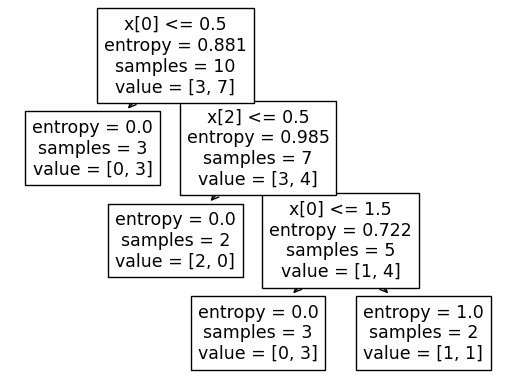

In [8]:
# visualize the model's decision regions


X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
tree.plot_tree(clf)

plt.show()

## Evaluate the model performance

In [9]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_y_pred = dummy_clf.fit(X_train, y_train).predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Dummy Accuracy:",metrics.accuracy_score(y_test, dummy_y_pred))
print("DecisionTreeClassifier Accuracy:",metrics.accuracy_score(y_test, y_pred))


Dummy Accuracy: 0.5
DecisionTreeClassifier Accuracy: 0.75


In [10]:
# Model Precision: what percentage of positive variable are labeled as such?
print("Dummy Precision:",metrics.precision_score(y_test, dummy_y_pred))
print("DecisionTreeClassifier Precision:",metrics.precision_score(y_test, y_pred))

Dummy Precision: 0.5
DecisionTreeClassifier Precision: 1.0


In [11]:
# Model Recall: what percentage of positive cases are labelled as such?
print("Dummy Recall:",metrics.recall_score(y_test, dummy_y_pred))
print("DecisionTreeClassifier Recall:",metrics.recall_score(y_test, y_pred))

Dummy Recall: 1.0
DecisionTreeClassifier Recall: 0.5


In [12]:
print(metrics.confusion_matrix(y_test, y_pred=y_pred))

[[2 0]
 [1 1]]
